In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [50]:
input_path = './data/offside_1/014.mp4'
video1 = cv2.VideoCapture(input_path)

In [51]:
with open('darknet/cfg/coco.names') as f:
    labels = [line.strip() for line in f]
network = cv2.dnn.readNet('darknet/cfg/yolov3.weights', 'darknet/cfg/yolov3.cfg')
ln = network.getLayerNames()
ln = [ln[i-1] for i in network.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(labels), 3))

In [52]:

video1.set(cv2.CAP_PROP_POS_FRAMES, 0)

True

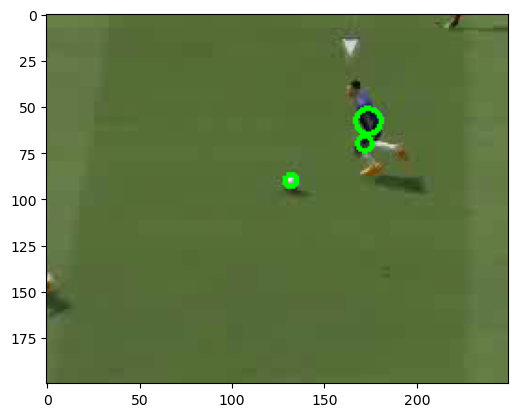

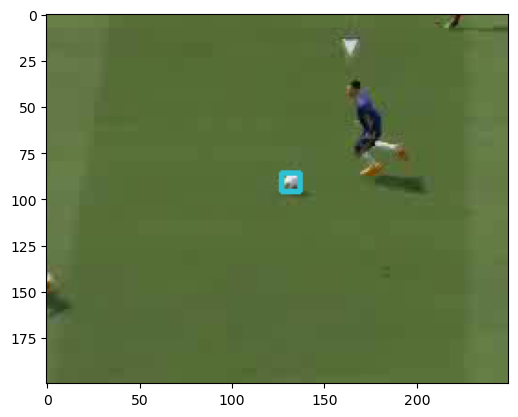

In [6]:
while True:
    ret, frame = video1.read()
    frame = frame[200:400, 750:1000]

    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask_ground = cv2.inRange(frame_hsv, np.array([0,0,0]), np.array([255,60,255]))
    # plt.imshow(cv2.cvtColor(mask_ground))
    # plt.imshow(mask_ground, cmap='gray')
    # plt.show()
    plt.figure()
    
    hframe = frame.copy()
    gframe = cv2.cvtColor(hframe, cv2.COLOR_BGR2GRAY)
    # gframe = cv2.medianBlur(gframe, 5)
    circles = cv2.HoughCircles(gframe, cv2.HOUGH_GRADIENT, 1, 9, param1=50, param2=10, minRadius=3, maxRadius=9)
    circles = circles if circles is not None else np.array([[]])
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(hframe, (i[0], i[1]), i[2], (0,255,0), 2)
        continue
    plt.imshow(cv2.cvtColor(hframe, cv2.COLOR_BGR2RGB))
    plt.show()
    # plt.imshow(gframe)

    plt.figure()
    SPORTS_BALL = 32
    height, width = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1/255., (416, 416), swapRB=True, crop=False)
    network.setInput(blob)
    output_from_network = network.forward(ln)
    boxes=[]
    confidences = []
    for out in output_from_network:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            if class_id != SPORTS_BALL: continue
            confidence = scores[class_id]
            if confidence>0.1:
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int((detection[0] - detection[2]/2) * width)
                y = int((detection[1] - detection[3]/2) * height)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    boxes = np.asarray(boxes)[indexes]
    for i, box in enumerate(boxes):
        x, y, w, h = box
        color = colors[i]
        cv2.rectangle(frame, (x,y), (x+w, y+h), color, 2)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()
    break

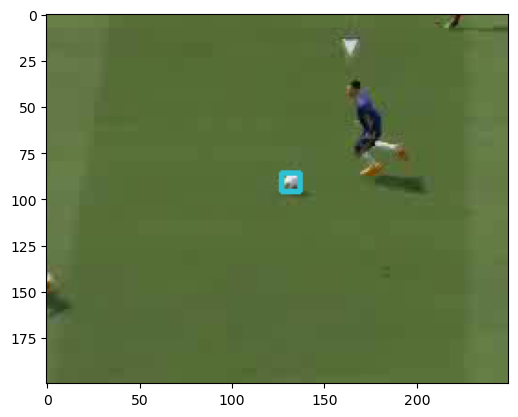

In [7]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

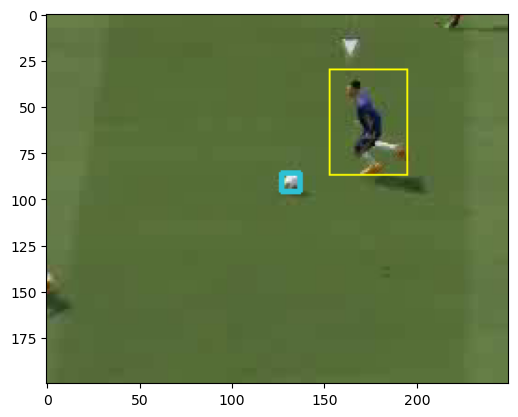

In [9]:
cv2.rectangle(
    frame, (153, 30), (195, 87), (0, 255, 255)
)

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

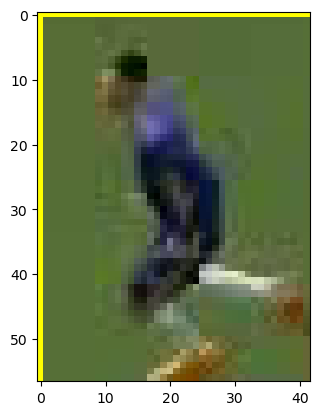

In [10]:
cropped = frame[30:87, 153:195]
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

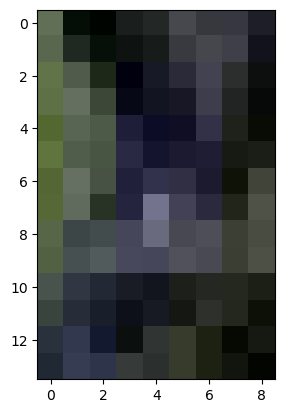

In [12]:
h, w = cropped.shape[:2]
butt = cropped[h//2:3*h//4, 2*w//5:3*w//5]
plt.imshow(cv2.cvtColor(butt, cv2.COLOR_BGR2RGB))

In [21]:
butt_hsv = cv2.cvtColor(butt, cv2.COLOR_BGR2HSV)
# butt_H, butt_S, butt_V = butt_hsv
butt_H = butt_hsv[:,:,0]
butt_S = butt_hsv[:,:,1]
butt_V = butt_hsv[:,:,2]
bins = np.arange(0, 256, 30)
np.histogram(butt_S, bins)

(array([14, 39, 32, 21,  7,  7,  2,  1]),
 array([  0,  30,  60,  90, 120, 150, 180, 210, 240]))

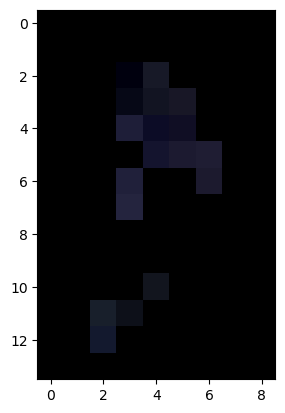

In [34]:
some_butt = np.where(butt_S.reshape(14, 9, 1)>100, butt, [0,0,0]).astype(np.uint8)
some_butt = np.where((butt_H.reshape(14,9,1)>80)|(butt_H.reshape(14,9,1)<30), some_butt, [0,0,0]).astype(np.uint8)
plt.imshow(cv2.cvtColor(some_butt, cv2.COLOR_BGR2RGB))
# plt.imshow(some_butt)
# some_butt

In [36]:
for r in range(14):
    for c in range(9):
        if some_butt[r,c,:].sum() != 0:
            print(some_butt[r,c,0])

14
39
22
34
38
56
38
36
46
48
51
58
46
62
30
43
25
46


In [38]:
bins = np.linspace(0, 256, 12)
np.histogram(some_butt, bins)

(array([345,  28,   5,   0,   0,   0,   0,   0,   0,   0,   0]),
 array([  0.        ,  23.27272727,  46.54545455,  69.81818182,
         93.09090909, 116.36363636, 139.63636364, 162.90909091,
        186.18181818, 209.45454545, 232.72727273, 256.        ]))

In [210]:
def get_butt_HSV(box, tid):
    h, w = box.shape[:2]
    butt = box[h//2:3*h//4, 2*w//5:3*w//5]
    bh, bw = butt.shape[:2]
    butt_hsv = cv2.cvtColor(butt, cv2.COLOR_BGR2HSV)
    butt_H = butt_hsv[:,:,0]
    butt_S = butt_hsv[:,:,1]
    butt_V = butt_hsv[:,:,2]
    some_butt = np.where(butt_S.reshape(bh, bw, 1)>100, butt_hsv, [0,0,0]).astype(np.uint8)
    some_butt = np.where(butt_V.reshape(bh, bw, 1)>50, some_butt, [0,0,0]).astype(np.uint8)
    some_butt = np.where((butt_H.reshape(bh,bw,1)>80)|(butt_H.reshape(bh,bw,1)<30), some_butt, [0,0,0]).astype(np.uint8)
    bins = np.array([1, 30, 80, 135, 160, 180])
    hist, bns = np.histogram(some_butt[:,:,0].flatten(), bins)
    category = np.argmax(hist)
    if hist.sum() < 10 or category not in [0, 2, 4]: return 'else'
    if category in [0, 4]: return 'red'
    return 'blue'

In [170]:
a = np.array([1, 2, 3, 4,5, 6, 7, 8])
bins = np.array([2.4, 5.4, 7.1])
np.histogram(a, bins)

(array([3, 2]), array([2.4, 5.4, 7.1]))

In [221]:
a = np.array([[1, 2, 2],
                [5, 2, 3],
                [1, 6, 2],
                [3, 7, 3],
                [9, 2, 1]])
aa = a.argmax(axis=1)
b = np.arange(5)+100
b[aa==1]
# aa

array([100, 102, 103])

In [62]:
import pickle
with open('./temp.pickle', 'rb') as fp:
    human_tids_tlwhs_list = pickle.load(fp)

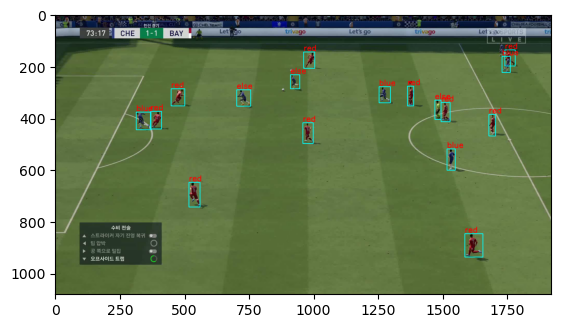

In [211]:
video1.set(cv2.CAP_PROP_POS_FRAMES, 0)
fr = 0
while True:
    ret, frame = video1.read()
    tids, tlwhs = human_tids_tlwhs_list[fr]
    for tid, (x, y, w, h) in zip(tids, tlwhs):
        if y<120: continue
        x, y, w, h = int(x), int(y), int(w), int(h)
        box = frame[y:y+h, x:x+w].copy()
        team = get_butt_HSV(box, tid)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,255,0),2)
        cv2.putText(frame, team, (x,y-5),cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255),2)
        # cv2.putText(frame, str(tid), (x,y-5),cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255),2)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    break

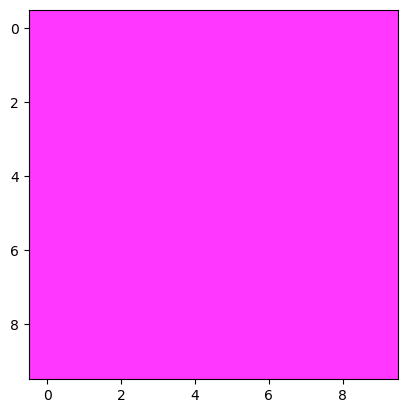

In [161]:
imim = np.zeros((10, 10, 3), dtype=np.uint8)
imim[:,:] = [150, 200, 255]
plt.imshow(cv2.cvtColor(imim, cv2.COLOR_HSV2RGB))